In [1]:
using Pkg
Pkg.activate(".")

  Activating project at `~/code/phasor_julia`


In [2]:
using PhasorNetworks
using Plots
using Random: Xoshiro, AbstractRNG

In [3]:
include("resonator.jl")

factor3_test_spiking (generic function with 1 method)

In [4]:
n_cb = 20
n_vsa = 1024

1024

In [5]:
rng0 = Xoshiro(42)

Xoshiro(0xa379de7eeeb2a4e8, 0x953dccb6b532b3af, 0xf597b8ff8cfd652a, 0xccd7337c571680d1, 0xc90c4a0730db3f7e)

In [9]:
using DifferentialEquations: Heun, Tsit5

In [10]:
sa = SpikingArgs(solver = Heun(),
solver_args = Dict(:adaptive => false, 
                :dt => 0.01),
                threshold = 0.001)

Neuron parameters: Period 1.0 (s)
Current kernel duration: 0.01 (s)
Threshold: 0.001 (V)


In [11]:
repeats = 20
tspan = (0.0, repeats * sa.t_period)

(0.0, 20.0)

In [12]:
X_cb = random_symbols((n_cb, n_vsa), rng0)
Y_cb = random_symbols((n_cb, n_vsa), rng0)
Z_cb = random_symbols((n_cb, n_vsa), rng0);

In [13]:
rng1 = deepcopy(rng0)

Xoshiro(0x7b06c191ae7eade6, 0x55d33ea7abcb1149, 0x54b36be142612aef, 0x13a5537a86f19b61, 0xc90c4a0730db3f7e)

In [14]:
ptt = x -> phase_to_train(x, spk_args=sa, repeats = repeats)

#53 (generic function with 1 method)

In [15]:
X_cb2 = ptt(X_cb)
Y_cb2 = ptt(Y_cb)
Z_cb2 = ptt(Z_cb);

In [16]:
fac_i, fac_spk, sym_spk = generate_composition(rng0, sa, tspan, X_cb2, Y_cb2, Z_cb2)

([1, 16, 19], SpikeTrain[Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.], Spike Train: (1, 1024) with 19016 spikes.)

In [17]:
fac_i2, fac_phase, sym_phase = generate_composition(rng1, X_cb, Y_cb, Z_cb)

([1, 16, 19], [-0.0910341739654541 0.18797945976257324 … 0.06673598289489746 0.2970832586288452; -0.3065168857574463 -0.016473770141601562 … -0.09602761268615723 -0.8534413576126099; -0.1334984302520752 0.23561692237854004 … -0.2857959270477295 0.26616859436035156], [-0.5310494899749756 0.4071226119995117 … -0.31508755683898926 -0.2901895046234131])

In [18]:
sym_spk_dec = train_to_phase(sym_spk, sa)[end-1,:,:]

1×1024 Matrix{Float64}:
 -0.553724  0.385392  -0.178482  …  -0.00227448  -0.337427  -0.312811

In [19]:
#check similarity of composed symbol
similarity(sym_phase, sym_spk_dec)

1×1 Matrix{Float64}:
 0.9975152728041052

In [20]:
xx = v_unbind(sym_spk, v_bind(fac_spk[3],fac_spk[2], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17875 spikes.

In [21]:
sxs = similarity_outer(xx, X_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … 0.999835 0.999835]  …  [-1.0 -1.0 … -0.00729054 -0.00727314]

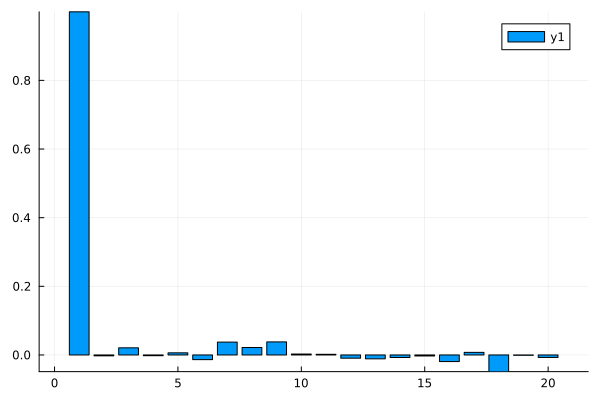

In [22]:
bar([x[end] for x in vec(sxs)])

In [23]:
yy = v_unbind(sym_spk, v_bind(fac_spk[1],fac_spk[3], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17903 spikes.

In [24]:
sys = similarity_outer(yy, Y_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … -0.00010877 -0.00012049]  …  [-1.0 -1.0 … -0.0202652 -0.0202711]

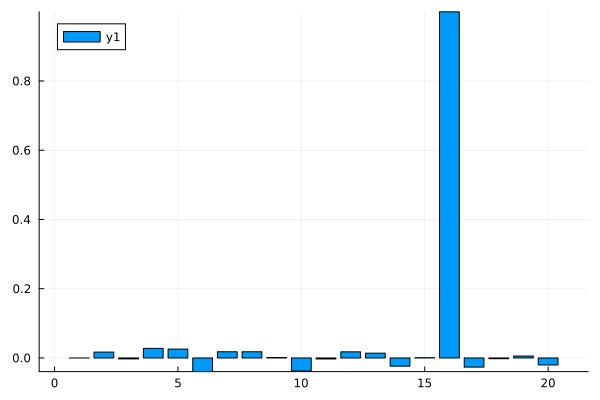

In [25]:
bar([x[end] for x in vec(sys)])

In [26]:
zz = v_unbind(sym_spk, v_bind(fac_spk[1],fac_spk[2], spk_args=sa, tspan=tspan), spk_args=sa, tspan=tspan)

Spike Train: (1, 1024) with 17992 spikes.

In [27]:
szs = similarity_outer(zz, Z_cb2, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

1×20 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … -0.00789612 -0.00787962]  …  [-1.0 -1.0 … -0.00585591 -0.00585165]

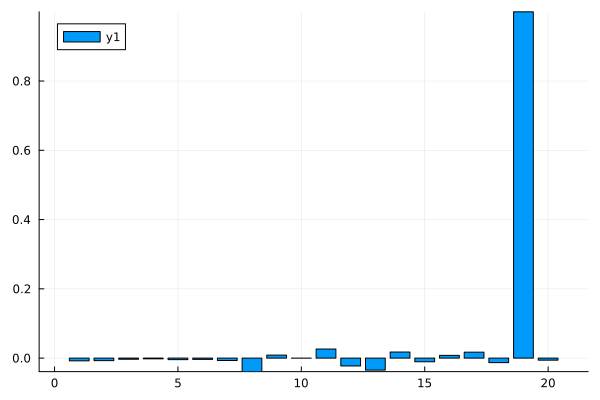

In [28]:
bar([x[end] for x in vec(szs)])

In [29]:
fac_i

3-element Vector{Int64}:
  1
 16
 19

In [30]:
x_cb, y_cb, z_cb = initialize_guesses(X_cb, Y_cb, Z_cb)

3-element Vector{Matrix{Float64}}:
 [-0.3590450331537608 -0.12601368849529404 … -0.007139724235720468 0.29186573919248443]
 [0.755667336520337 0.8475005839653564 … 0.4821915168463748 -0.30048840957188777]
 [0.13805197132714905 -0.7830481773267493 … -0.2737929510652372 -0.4138172421881136]

In [31]:
x_cbs, y_cbs, z_cbs = initialize_guesses(sa, tspan, X_cb2, Y_cb2, Z_cb2)

3-element Vector{SpikeTrain}:
 Spike Train: (1, 1024) with 20480 spikes.
 Spike Train: (1, 1024) with 20480 spikes.
 Spike Train: (1, 1024) with 20480 spikes.

In [32]:
#check simliarity of initial guesses

In [33]:
similarity(train_to_phase(x_cbs, spk_args=sa)[end-1,1:1,:], x_cb)

1×1 Matrix{Float64}:
 0.999803327466654

In [34]:
similarity(train_to_phase(y_cbs, spk_args=sa)[end-1,1:1,:], y_cb)

1×1 Matrix{Float64}:
 0.9997897514548254

In [35]:
similarity(train_to_phase(z_cbs, spk_args=sa)[end-1,1:1,:], z_cb)

1×1 Matrix{Float64}:
 0.9998105755853857

In [36]:
function refine2(composite::AbstractArray, factor_codebook::AbstractArray, external::AbstractMatrix)
    #bind the symbols for external factors
    external = v_bind(external, dims=1)

    #unbind external factors from the composite symbol
    factor = v_unbind(composite, external)

    #calculate the similarity to the codebook
    s = similarity_outer(factor, factor_codebook, dims=1)
    s = abs.(dropdims(s, dims=1))
    w = normalize(s)
    new_guess = v_bundle_project(factor_codebook, w, zeros((size(s,1), size(factor_codebook,2))))
    return s, w, new_guess
end 

function refine2(composite::SpikeTrain, factor_codebook::SpikeTrain, external::Array{<:SpikeTrain}, spk_args::SpikingArgs, tspan::Tuple{<:Real, <:Real})
    #bind the symbols for external factors
    bindfn = (x, y) -> v_bind(x, y, spk_args=spk_args, tspan=tspan)
    external = reduce(bindfn, external)
    #return external

    #unbind external factors from the composite symbol
    factor = v_unbind(composite, external, spk_args=spk_args, tspan=tspan)

    #calculate the similarity to the codebook
    s = similarity_outer(factor_codebook, factor, dims=1, reduce_dim=2, spk_args=spk_args, tspan=tspan)
    w = reshape(abs.([x[end] for x in vec(s)]), (1, :))
    w = normalize(w)
    new_guess = v_bundle_project(factor_codebook, w, zeros((size(w,1), size(factor_codebook)[2])), spk_args=spk_args, tspan=tspan)
    return s, w, new_guess
end

refine2 (generic function with 2 methods)

In [37]:
ss, ws, rs = refine2(sym_spk, X_cb2, [y_cbs, z_cbs], sa, tspan)

([[-1.0 -1.0 … 0.03388091449833423 0.033899177460531296]; [-1.0 -1.0 … 0.020852388507594778 0.02087136873160448]; … ; [-1.0 -1.0 … 0.01712611704607464 0.017109770136812506]; [-1.0 -1.0 … -0.03791890154189214 -0.037938483007324074];;], [0.5544792948567119 0.34138709797512296 … 0.27985968956520924 0.6205490776384374], Spike Train: (1, 1024) with 20480 spikes.)

In [38]:
sp, wp, rp = refine2(sym_phase, X_cb, cat(y_cb, z_cb, dims=1))

([0.0343720933195405 0.020737599598229493 … 0.016776018728589793 0.03758598804891296], [0.5616940791552975 0.33888500190929016 … 0.2741465381245869 0.6142141751452225], [-0.2249892525568293 -0.005731470698575537 … -0.08910962374342737 0.3884202045420752])

In [39]:
ss = cat(ss..., dims=1);

In [40]:
size(ss)

(20, 2001)

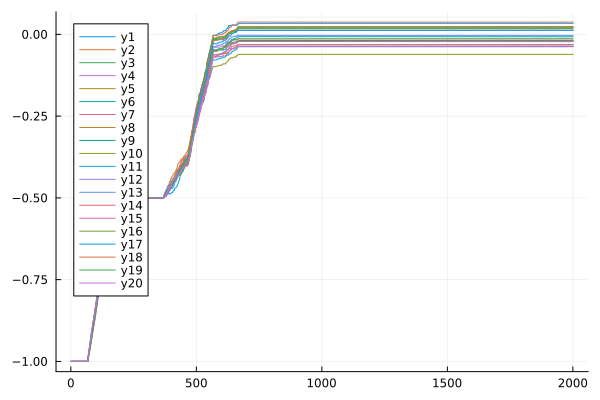

In [41]:
plot(ss')

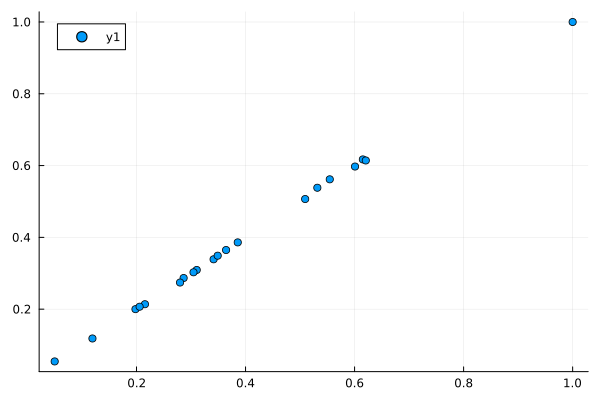

In [42]:
scatter(vec(ws), vec(wp))

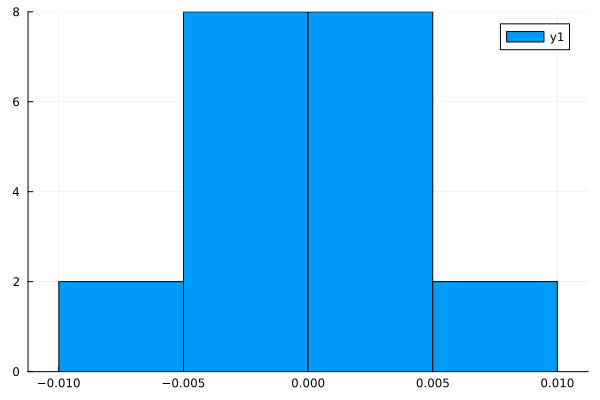

In [44]:
histogram(vec(ws) .- vec(wp))

In [45]:
rs_dec = train_to_phase(rs, sa);

In [46]:
size(rs_dec)

(20, 1, 1024)

In [47]:
[sum(isnan.(rs_dec[i,:,:])) for i in axes(rs_dec,1)]

20-element Vector{Int64}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0

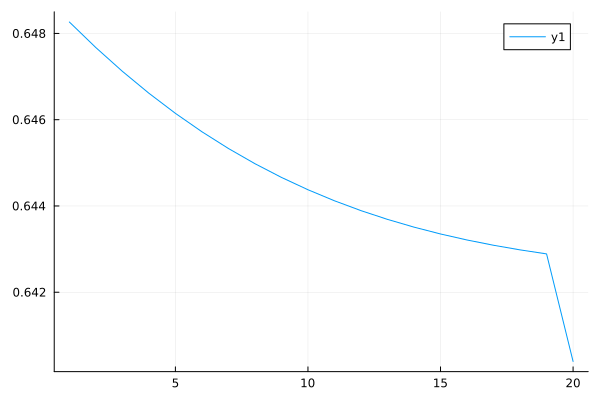

In [48]:
plot(rs_dec[:,1,40])

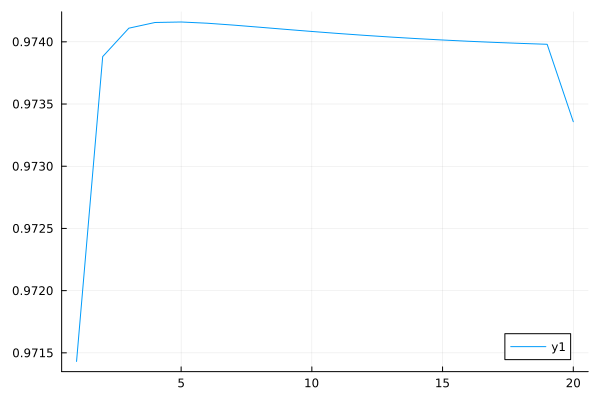

In [49]:
plot([similarity(zero_nans(rs_dec[i,:,:]), rp)[1] for i in axes(rs_dec,1)])

In [53]:
sr = similarity_outer(X_cb2, rs, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)

20×1 Matrix{Matrix{Float64}}:
 [-1.0 -1.0 … 0.24614472858662448 0.24614382586559477]
 [-1.0 -1.0 … 0.17381675732096669 0.1738167028362989]
 [-1.0 -1.0 … 0.16867353454676473 0.16866131572563983]
 [-1.0 -1.0 … 0.11757745106959172 0.11757299731232716]
 [-1.0 -1.0 … 0.24487560670025668 0.24490467999211918]
 [-1.0 -1.0 … 0.06134964533753724 0.06135568941127711]
 [-1.0 -1.0 … 0.07299643313023357 0.07298912283700551]
 [-1.0 -1.0 … 0.13713518285343446 0.1371190553653301]
 [-1.0 -1.0 … 0.10701424779475384 0.1070415977777602]
 [-1.0 -1.0 … 0.4363270013957734 0.43631852798728865]
 [-1.0 -1.0 … 0.2920521968361432 0.2920565420355526]
 [-1.0 -1.0 … 0.17319764566690174 0.17321345499646917]
 [-1.0 -1.0 … 0.02610478880680145 0.026118558776359792]
 [-1.0 -1.0 … 0.15981360349629498 0.15983013718704236]
 [-1.0 -1.0 … 0.21488060622712607 0.21488696219861045]
 [-1.0 -1.0 … 0.07759115383302548 0.07763121182417096]
 [-1.0 -1.0 … 0.07634161705152233 0.07633549383947265]
 [-1.0 -1.0 … 0.28825645009062617 0.2882

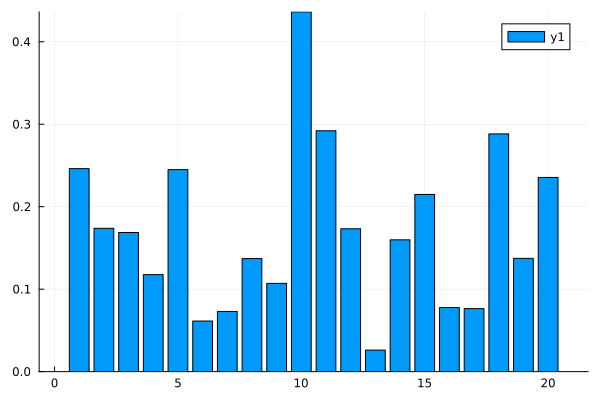

In [54]:
bar([x[end] for x in vec(sr)])

In [55]:
g = resonate(sym_spk, sa, tspan, 10,  X_cb2, Y_cb2, Z_cb2)

11-element Vector{Vector{SpikeTrain}}:
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20479 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes., Spike Train: (1, 1024) with 20480 spikes.]
 [Spike Train: (1, 1024) with 20480 spikes.,

In [56]:
function final_similarity(train::SpikeTrain, codebook::SpikeTrain; spk_args::SpikingArgs, tspan::Tuple{<:Real, <:Real})
    sim = similarity_outer(train, codebook, dims=1, reduce_dim=2, spk_args=sa, tspan=tspan)
    sim_final = [s[end] for s in sim]
    return sim_final
end

final_similarity (generic function with 1 method)

In [57]:
xmapfn = x -> final_similarity(x[1], X_cb2, spk_args=sa, tspan=tspan)

#76 (generic function with 1 method)

In [58]:
xsims = cat(map(xmapfn, g)..., dims=1)

11×20 Matrix{Float64}:
 0.199941   0.218738     0.191108   …   0.207674      0.187578
 0.246144   0.173817     0.168661       0.137352      0.235489
 0.688482   0.0935249    0.106695       0.156185      0.142099
 0.971552   0.0219638    0.0364067      0.00360646    0.0586622
 0.998034   0.000827993  0.0282441      0.000996098  -0.00390626
 0.998002  -0.000106603  0.0295249  …  -0.000339939  -0.0039539
 0.997999  -0.000248939  0.0297289     -0.000587783  -0.00442023
 0.998002  -0.000266997  0.029739      -0.000589998  -0.00442703
 0.998002  -0.000271531  0.0297404     -0.000591437  -0.0044274
 0.998002  -0.000271941  0.0297401     -0.000591842  -0.00442753
 0.998002  -0.00027197   0.0297401  …  -0.000591846  -0.00442755

In [59]:
ymapfn = x -> final_similarity(x[2], Y_cb2, spk_args=sa, tspan=tspan)

#78 (generic function with 1 method)

In [60]:
ysims = cat(map(ymapfn, g)..., dims=1)

11×20 Matrix{Float64}:
 0.204488    0.207741    0.18809     0.20913    …  0.165312     0.173208
 0.113496    0.246142    0.281246    0.0636773     0.21284      0.0643675
 0.0646907   0.252206    0.205269    0.122157      0.242208     0.0367252
 0.0102792   0.0233225   0.0210778   0.0637943     0.017965    -0.0111371
 0.00310018  0.0239104  -0.00284978  0.0443136     0.00648747  -0.00924964
 0.00186383  0.0241868  -0.0037314   0.040956   …  0.00659682  -0.0115861
 0.00185214  0.024217   -0.003601    0.0405142     0.00637225  -0.0114869
 0.00182515  0.0242138  -0.00361433  0.0405185     0.00636483  -0.0114887
 0.00182289  0.024214   -0.00361413  0.0405231     0.00636612  -0.0114825
 0.00182302  0.0242142  -0.00361437  0.0405234     0.00636617  -0.0114819
 0.00182305  0.0242142  -0.00361441  0.0405234  …  0.00636618  -0.0114819

In [61]:
zmapfn = x -> final_similarity(x[3], Z_cb2, spk_args=sa, tspan=tspan)

#80 (generic function with 1 method)

In [62]:
zsims = cat(map(zmapfn, g)..., dims=1)

11×20 Matrix{Float64}:
  0.177426     0.205254     0.188932    …  0.197474   0.201449
  0.0549824    0.106487     0.234739       0.275234   0.179149
  0.00486152   0.199873     0.0679436      0.723334   0.232076
  0.00430213   0.0513178    0.0170637      0.982819  -0.00236333
 -0.00220526  -0.00366292  -0.00295262     0.998244  -0.00115388
 -0.00474504  -0.00218182  -0.00483157  …  0.998411  -0.00109627
 -0.00479333  -0.00227462  -0.00482901     0.998385  -0.000794291
 -0.004752    -0.00228902  -0.00484669     0.998383  -0.00075054
 -0.00475021  -0.00228654  -0.00484956     0.998382  -0.00074821
 -0.00475027  -0.00228668  -0.00484994     0.998382  -0.000748132
 -0.00475022  -0.00228672  -0.00484993  …  0.998382  -0.000748084

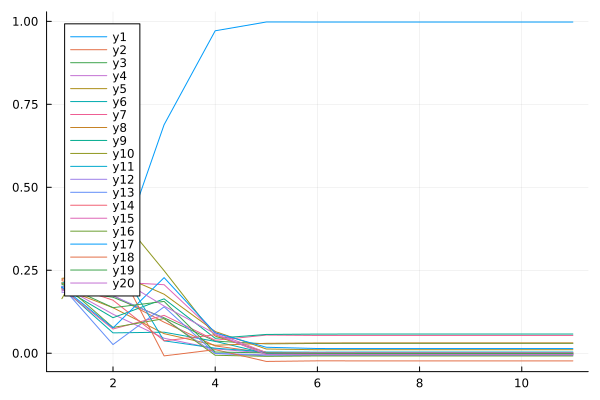

In [63]:
plot(xsims)

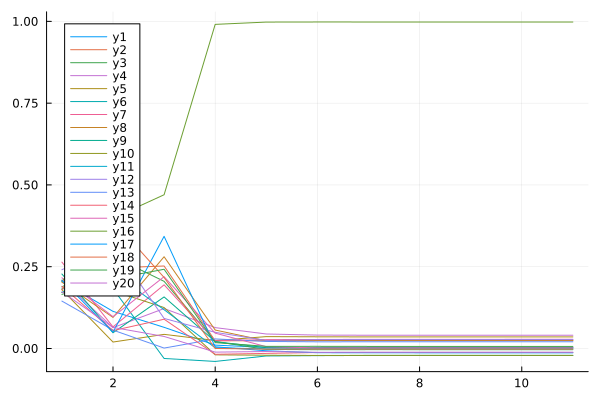

In [64]:
plot(ysims)

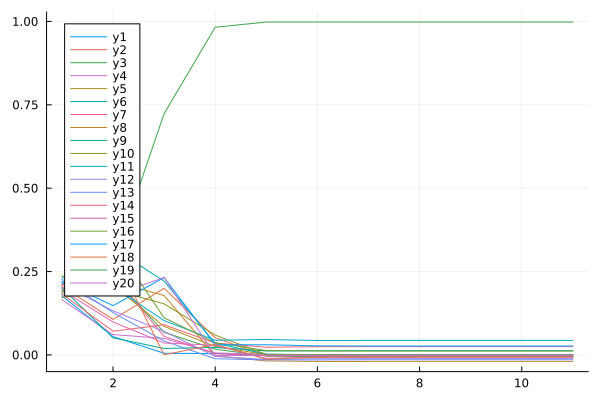

In [65]:
plot(zsims)

In [66]:
allsims = stack((xsims', ysims', zsims'), dims=1)

3×20×11 Array{Float64, 3}:
[:, :, 1] =
 0.199941  0.218738  0.191108  0.202511  …  0.221809  0.207674  0.187578
 0.204488  0.207741  0.18809   0.20913      0.179894  0.165312  0.173208
 0.177426  0.205254  0.188932  0.165763     0.207731  0.197474  0.201449

[:, :, 2] =
 0.246144   0.173817  0.168661  0.117573   …  0.288259  0.137352  0.235489
 0.113496   0.246142  0.281246  0.0636773     0.391926  0.21284   0.0643675
 0.0549824  0.106487  0.234739  0.0609795     0.306374  0.275234  0.179149

[:, :, 3] =
 0.688482    0.0935249  0.106695   …  -0.00799597   0.156185  0.142099
 0.0646907   0.252206   0.205269       0.217076     0.242208  0.0367252
 0.00486152  0.199873   0.0679436      0.000506212  0.723334  0.232076

;;; … 

[:, :, 9] =
  0.998002    -0.000271531   0.0297404   …  -0.000591437  -0.0044274
  0.00182289   0.024214     -0.00361413      0.00636612   -0.0114825
 -0.00475021  -0.00228654   -0.00484956      0.998382     -0.00074821

[:, :, 10] =
  0.998002    -0.000271941   0.02

In [43]:
xc, xi = extract_trends(fac_i[1], xsims')

([0.1999405515457615, 0.24656918269795683, 0.6680026575252258, 0.9640729744923138, 0.998068931001284, 0.9979933656149411, 0.9979996623352029, 0.9980015583836835, 0.9980015648869336, 0.9980015337264121, 0.9980015404767262], [0.21873809834030025 0.17409991966097677 … -0.0002719219835069942 -0.0002719827813967707; 0.19110770219789394 0.16901589995400187 … 0.02974007339225332 0.029740117601712933; … ; 0.20767413400144827 0.13737769839482455 … -0.0005918541650477294 -0.0005918519753206185; 0.18757779987924011 0.23404310784642068 … -0.004427518275203053 -0.004427545042494662])

In [44]:
xc

11-element Vector{Float64}:
 0.1999405515457615
 0.24656918269795683
 0.6680026575252258
 0.9640729744923138
 0.998068931001284
 0.9979933656149411
 0.9979996623352029
 0.9980015583836835
 0.9980015648869336
 0.9980015337264121
 0.9980015404767262

In [45]:
xi

19×11 Matrix{Float64}:
 0.218738  0.1741     0.099892     0.0301679    …  -0.000271922  -0.000271983
 0.191108  0.169016   0.10032      0.035728         0.0297401     0.0297401
 0.202511  0.116677   0.0394281    0.00255696      -0.00120419   -0.00120414
 0.225626  0.244785   0.187947     0.0799418        0.0106039     0.0106039
 0.198299  0.0615651  0.0683906    0.0461297       -0.00273744   -0.00273741
 0.194882  0.0722495  0.113753     0.0501582    …   0.0536182     0.0536182
 0.196364  0.137126   0.0469419    0.0260456        0.0311313     0.0311314
 0.197759  0.106216   0.168997     0.0430518        0.0577982     0.0577982
 0.164331  0.43583    0.264146     0.0687355        0.00160301    0.00160299
 0.210099  0.290699   0.0373943    0.0131521        0.00363429    0.00363435
 0.183891  0.171851   0.120163     0.00626003   …  -0.00342484   -0.00342482
 0.200466  0.0250595  0.149672     0.000484582     -0.00671588   -0.00671589
 0.210781  0.159156   0.0500078    0.0514175       -0.002

In [46]:
all_c, all_i = extract_all_trends(fac_i, xsims', ysims', zsims')

([0.1999405515457615 0.24656918269795683 … 0.9980015337264121 0.9980015404767262; 0.2049492454201483 0.3983277266161235 … 0.9980777583393019 0.9980777581097989; 0.19747370728189406 0.2747730538235839 … 0.9983823718286662 0.9983823627577203], [0.21873809834030025 0.17409991966097677 … -0.0002719219835069942 -0.0002719827813967707; 0.19110770219789394 0.16901589995400187 … 0.02974007339225332 0.029740117601712933; … ; 0.20773060747782784 0.3049759445660199 … -0.006816121529693683 -0.006816069793933328; 0.20144944343933718 0.17893908662354557 … -0.0007481320706441658 -0.0007480967246932483])

In [47]:
all_c |> size

(3, 11)

In [48]:
all_i |> size

(57, 11)

In [49]:
check(fac_i, xsims', ysims', zsims')

3-element Vector{Bool}:
 1
 1
 1

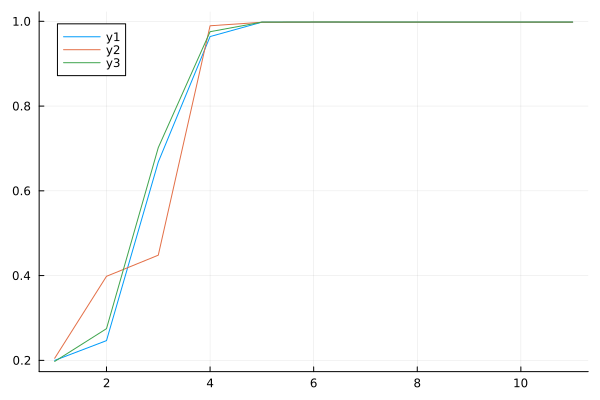

In [50]:
plot(all_c')

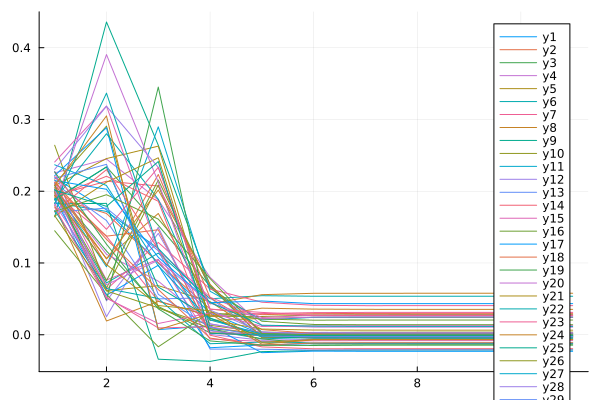

In [51]:
plot(all_i')

In [52]:
fac_i

3-element Vector{Int64}:
  1
 16
 19

In [53]:
rng0

Xoshiro(0xe5c3104c70b513e3, 0x459b2b2b627f8269, 0xda8dfa6c056cb4ee, 0xc0f95e7204032f33, 0xc90c4a0730db3f7e)

In [55]:
@time a0, t0 = factor3_test_spiking(rng0, 20, 1024, 20, sa, 20)

384.107313 seconds (80.32 M allocations: 1.144 TiB, 21.04% gc time, 0.06% compilation time)


(Bool[1, 1, 1], ([0.19109757029368707 0.46890494299235397 … 0.9982426368694677 0.9982426422163322; 0.1630113409723964 0.009876994108803315 … 0.9979991416568931 0.9979991395637033; 0.21716319652222663 0.2320025632096926 … 0.9956409956711496 0.9956409917359382], [0.20250867656251942 0.06244361426773458 … 0.009658126540725334 0.00965813130242979; 0.21703902777764414 0.07210777003800403 … 0.009332736887622739 0.009332726868049462; … ; 0.23172741641071198 0.2560238678980987 … 0.07262960672555806 0.07262960933431009; 0.2094599925021685 0.17262647138796994 … -0.004383938976662647 -0.004383938915238448]))

In [56]:
a0

3-element Vector{Bool}:
 1
 1
 1

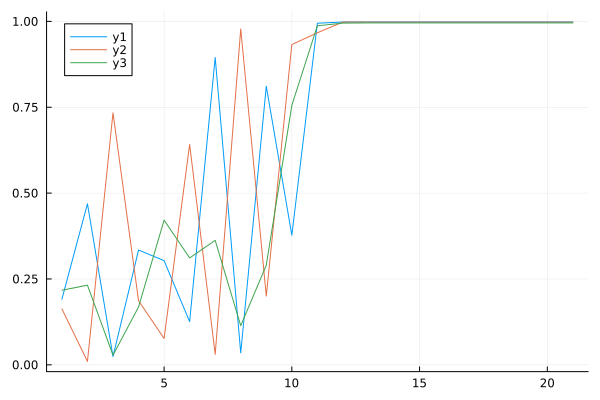

In [57]:
plot(t0[1]')

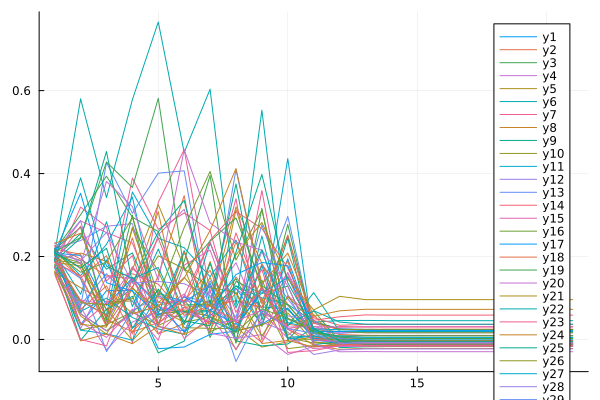

In [58]:
plot(t0[2]')